<a href="https://colab.research.google.com/github/edmarRod/Courses/blob/main/Statistics/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Null hypothesis significance testing framework (NHST)
The hypothesis is that the world or population is a certain way, specifically for statistics, it is a statement about a population-level parameter, such as a population mean being a specific value.

The null hypothesis, $H_O$, is the status-quo, which we would like to disprove.
We disprove it by collecting data from a population, $X$, and condense it via a function into a single number, which is called the test statistic.
\begin{align}
  T = f(X)
\end{align}

Since the test statistic is created from a random variable, it will also be a random variable, as such it will have a probability distribution function (PDF).

Under the NHST, we assume that $H_O$ is true, and this will decide the PDF of the test statistic, which will be called the null distribution. In other words, the null distribution is the PDF of the test statistic under the assumption that $H_O$ is true.

When we collect the data and transform it via the test function, we will receive a single number, which we can then compare with the null distribution to see how likely, or unlikely, it is that we get that number assuming $H_O$ is true. If the likelihood is low, this implies that there is a good chance that our null hypothesis is false and we can discard it.

However, since we are looking at likelihoods, we can't prove that the null hypothesis is true nor false, that is why we reject or fail to reject the hypothesis.


# One sample t-test

The one sample t-test deals with the comparison between a single sample from a population and its population.

For this test, we would like to compare the sample mean with the population mean. A possibility for doing this is by using the difference between the sample mean and the population mean as a test statistic. We can then assume the Central Limit Theorem holds, which would give us a normal distribution.
In other words, we can use as a test statistic:
\begin{align}
  T = \frac{(\bar{X} - μ)}{\frac{σ}{\sqrt{n}}} → \mathcal{N}(0,1)
\end{align}

Where: \\
  $\bar{X}$ is the sample mean \
  μ is the population mean\
  σ is the population standard deviation\
  $n$ is the sample size

This would give us a Z-distribution, which we could use to do a one-sample Z-test. However, since the population variance is unknown, we can't use this equation.
A solution for this is using the sample standard deviation, $S$, instead of the population standard deviation. The introduction of this second random variable changes the distribution from a normal distribution into a t-distribution.
In other words, we substiute σ with $S$, giving us:
\begin{align}
  S = \frac{∑_{i=1}^n (X_i - \bar{X})^2}{n-1}
\end{align}
\begin{align}
  \frac{(\bar{X} - μ)}{\frac{S}{\sqrt{n}}} \sim t_{n-1}
\end{align}

We can then use the t-distribution as the null distribution to compare our test statistic to. The t-distribution can be seen as a normal distribution with "fat" tails, i.e. has a higher likelihood of having outliers. This is due to the addition of the second random variable via the sample variance. The shape of the distribution changes with the the sample size, as higher samples sizes makes it resemble more a standard normal distribution.

![Normal vs t-distribution](https://static.wixstatic.com/media/e89071_590ad372a06a40ae97fb9b9b0b8e7253~mv2.png/v1/fill/w_650,h_371,al_c,lg_1,q_85,enc_auto/e89071_590ad372a06a40ae97fb9b9b0b8e7253~mv2.png)

Under the NHST, the p-value is the cumulative probability of getting a certain value, or a more extreme value, for the test statistic under the null distribution.

![p-value](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Mi348wzLb27e0B9ATeXWZw.png)


In summary for the one sample t-test, we are comparing the mean of a sample with a known population mean via the t test statistic, which has the t-distribution as its null distribution.

\begin{align}
  H_O: μ = \bar{X}\\
  \text{under }\\
  T = \frac{(\bar{X} - μ)}{\frac{S}{\sqrt{n}}} \sim t_{n-1}
\end{align}

Samples: [-1.62373111 -0.10178393 -1.8097911   0.26265384  0.25995268 -0.38108638
 -0.00228986  0.34161518  0.89757225 -0.36110011]
Function Test statistic: -0.9282336690117765
Manual Test statistic: -0.9282336690117763
P-value function: 0.37750890301744633
P-value manual: 0.37750890301744633


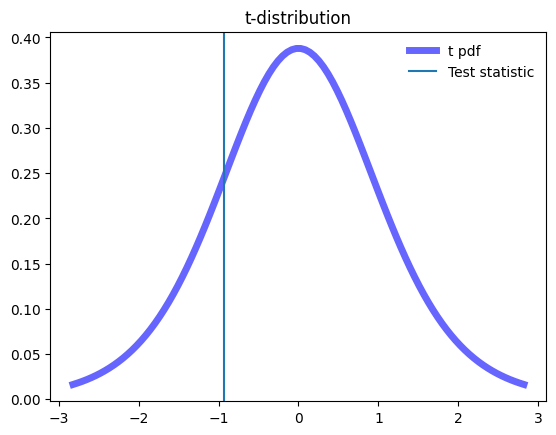

In [7]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(55)

# set params
dist_mean = 0
null_hyp_mean = 0
sample_size = 10

# get samples
df = sample_size - 1
samples = np.random.normal(loc=dist_mean, scale=1, size=sample_size)
print(f'Samples: {samples}')

# get test statistic
ttest_1samp = stats.ttest_1samp(samples, popmean=null_hyp_mean)
manual_test_stat = (samples.mean() - null_hyp_mean)/(samples.std(ddof=1)/np.sqrt(sample_size))
print(f'Function Test statistic: {ttest_1samp[0]}')
print(f'Manual Test statistic: {manual_test_stat}')

# plot statistic onto t-distribution
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.t.ppf(0.01, df),
                stats.t.ppf(0.99, df), 100)
ax.plot(x, stats.t.pdf(x, df),
       'b', lw=5, alpha=0.6, label='t pdf')
ax.axvline(manual_test_stat, label='Test statistic')
ax.legend(loc='best', frameon=False)
ax.set_title('t-distribution')
fig.show()

print(f'P-value function: {ttest_1samp[1]}')
print(f'P-value manual: {stats.t.cdf(manual_test_stat, df)*2}') #times 2 because its 2-sided

# Two sample t-test

The two sample t-test deals with the comparison between 2 samples, or 2 populations, A and B. We utilize the sample means as the statistic of comparison, and assume as our null hypothesis that the means are the same.

Given that, naturally we can utilize the difference between the means as our test statistic. However, to get the null distribution we can assume that the CLT holds and get the difference between the standardized normal distributions for A and B, this would net us for the test statistic:
\begin{align}
  T = \frac{(\bar{X_B} - \bar{X_A}) - (μ_B - μ_A)}{\sqrt{\frac{σ_B^2}{n_B} + \frac{σ_A^2}{n_A}}} \sim \mathcal{N}(0,1)
\end{align}

This would be a 2 sample Z-test, but the same problem arises as the 1 sample t-test where the population variance is unknown. As such we can substitute it by the sample variance, giving us:

\begin{align}
  T = \frac{(\bar{X_B} - \bar{X_A}) - (μ_B - μ_A)}{\sqrt{\frac{S_B^2}{n_B} + \frac{S_A^2}{n_A}}} \sim t_{df}
\end{align}

Where our null distribution is a t-distribution. The degrees of freedom in this case is rather complicated, but suffice to say it isn't n-1 and is already implemented in any scientific package.

In summary:
\begin{align}
  H_O: μ_b - μ_a = 0\\
  \text{under}\\
  T = \frac{(\bar{X_B} - \bar{X_A}) - (μ_B - μ_A)}{\sqrt{\frac{S_B^2}{n_B} + \frac{S_A^2}{n_A}}} \sim t_{df}
\end{align}



Samples A: [-1.62373111 -0.10178393 -1.8097911   0.26265384  0.25995268 -0.38108638
 -0.00228986  0.34161518  0.89757225 -0.36110011]
Samples B: [ 1.65644538 -1.1890092   1.66642853 -2.00343926 -0.47787271  1.36879857
  0.25816851  0.7023519   0.88838184  0.72221981]
Function Test statistic: 1.2880976679616736
Manual Test statistic: 1.2880976679616734
P-value function: 0.2140252874405845
P-value manual: 0.2140252874405848


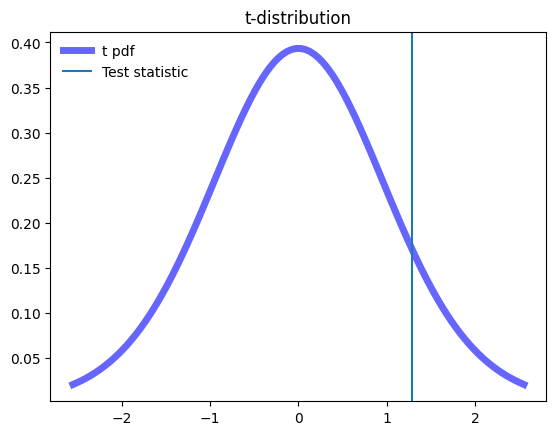

In [8]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(55)

# set params
dist_mean_a = 0
dist_mean_b = 0
sample_size = 10

# get samples
samples_a = np.random.normal(loc=dist_mean_a, scale=1, size=sample_size)
samples_b = np.random.normal(loc=dist_mean_b, scale=1, size=sample_size)
print(f'Samples A: {samples_a}')
print(f'Samples B: {samples_b}')

# get test statistic
ttest_2samp = stats.ttest_ind(a=samples_b, b=samples_a)
df = ttest_2samp.df

manual_test_stat = (samples_b.mean() - samples_a.mean())/(np.sqrt((samples_b.std(ddof=1)**2/sample_size) + (samples_a.std(ddof=1)**2/sample_size)))
print(f'Function Test statistic: {ttest_2samp[0]}')
print(f'Manual Test statistic: {manual_test_stat}')

# plot statistic onto t-distribution
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.t.ppf(0.01, df),
                stats.t.ppf(0.99, df), 100)
ax.plot(x, stats.t.pdf(x, df),
       'b', lw=5, alpha=0.6, label='t pdf')
ax.axvline(manual_test_stat, label='Test statistic')
ax.legend(loc='best', frameon=False)
ax.set_title('t-distribution')
fig.show()

print(f'P-value function: {ttest_2samp[1]}')
print(f'P-value manual: {stats.t.sf(manual_test_stat, df)*2}') #times 2 because its 2-sided

# Confidence Intervals

To either reject or fail to reject the null hypothesis, a certain threshold for the unlikelihood of the outcome must be set. This threshold defines what is known as the critical region, and its less extreme points are defined the critical points. This is done so that all the values in the critical region are used to reject the null hypothesis.

The chosen number for the threshold is used to control for the probability of rejecting the null hypothesis when it is true, which is defined as type-I error, or a false positive. This threshold is called the significance level for the test, and is usually α = 5%.

Since the normal distribution, which is usually the end distribution or similar to the distribution used for hypothesis tests, is symmetrical, the significance level is divided between both ends so that the critical points represent certain percentiles of the distribution. As such for a significance level of α = 5%, the critical points would be $t_{2.5\%}$ and $t_{97.5\%}$.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSp8PEygDNF5QRSy_LM6DawAtCRl0SctoMRlA&s)

To get the confidence interval, formally you start with:

\begin{align}
  P(T < t_{2.5\%} ∪ T > t_{97.5\%}) = 0.05 \\ \\
  P(t_{2.5\%} ≤ T ≤ t_{97.5\%}) = 0.95
\end{align}

i.e. If the probability of having more extreme values of the test statistic than the critical points is 5%, the probability of having a test statistic between the critical points is 95%.

After substituting the T for the test statistic, you can solve it so that the population parameters are within the inequalities and the random variables are on the outer part of the equation, thus giving you the confidence interval for a given significance level.

For example, for the two-sample t-test with the test statistic:

\begin{align}
  T = \frac{(\bar{X_B} - \bar{X_A}) - (μ_B - μ_A)}{σ_T} \\ \\
  σ_T = \sqrt{\frac{S_B^2}{n_B} + \frac{S_A^2}{n_A}}
\end{align}

After substituting and solving, the result is:

\begin{align}
P((\bar{X_B} - \bar{X_A}) - σ_Tt_{2.5\%} ≤  (μ_B - μ_A) ≤ (\bar{X_B} - \bar{X_A}) + σ_Tt_{97.5\%}) = 0.95
\end{align}

This changes the interpretation of the equation to: the probability that the difference between the population means is between the two values is 95%, giving us the confidence intervals.

This is the underlying process which gives the more commonly seen equation for confidence intervals:

\begin{align}
(LL, UL) = (\bar{X}_1 - \bar{X}_2) \pm t_{\alpha/2, \, df} \cdot \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}
\end{align}

Where LL and UL are the lower and upper limits, respectively.

Note that the confidence refers to the process for getting the confidence intervals, not the intervals themselves. This means that given a sample, there is no guarantee that the confidence interval contains the true difference, in reality we expect that the intervals do not contain the true difference 5% of the time.

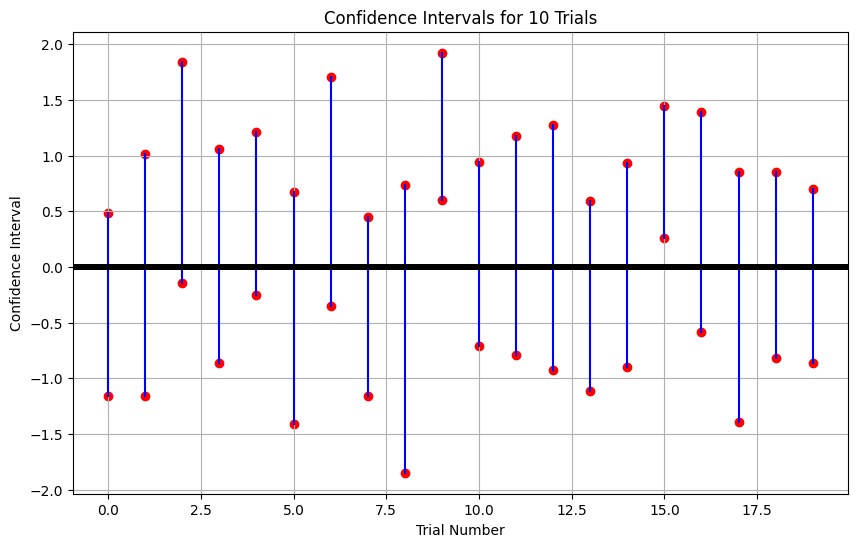

In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# set params
dist_mean_a = 0
dist_mean_b = 0
sample_size = 10

# run different trial tests to see variance of method
trials = []
for seed in range(20):
  np.random.seed(seed)

  samples_a = np.random.normal(loc=dist_mean_a, scale=1, size=sample_size)
  samples_b = np.random.normal(loc=dist_mean_b, scale=1, size=sample_size)

  ttest_2samp = stats.ttest_ind(a=samples_b, b=samples_a)
  df = ttest_2samp.df

  ll = (samples_b.mean() - samples_a.mean()) + stats.t.ppf(0.025, df)*np.sqrt((samples_b.std(ddof=1)**2/sample_size) + (samples_a.std(ddof=1)**2/sample_size))
  ul = (samples_b.mean() - samples_a.mean()) - stats.t.ppf(0.025, df)*np.sqrt((samples_b.std(ddof=1)**2/sample_size) + (samples_a.std(ddof=1)**2/sample_size))

  trials.append( {
      'LL': ll,
      'UL': ul
  })

df = pd.DataFrame(trials)

# plotting the confidence intervals
plt.figure(figsize=(10, 6))
for i in range(len(df)):
  plt.plot([i, i], [df['LL'][i], df['UL'][i]], color='blue')
  plt.scatter([i, i], [df['LL'][i], df['UL'][i]], color='red')
  plt.axhline(linewidth=4, color='black', y=dist_mean_b-dist_mean_a)

plt.xlabel('Trial Number')
plt.ylabel('Confidence Interval')
plt.title('Confidence Intervals for 10 Trials')
plt.grid(True)
plt.show()

# Power

Until now, only the null hypothesis was used, however there exists a secondary hypothesis which is called an alternative hypothesis, which is contrary to the null hypothesis.

It is defined as $H_a$ and is usually the complementary to the null hypothesis, e.g.
\begin{align}
  H_O: μ_b - μ_a = 0\\
  H_a: μ_b - μ_a \neq 0
\end{align}
 if the null hypothesis is there is no difference, then the alternative hypothesis can be that there is a difference.

Just like the null hypothesis, the alternative hypothesis can be rejected or failed to be rejected, the error of rejecting the alternative hypothesis when it is true is called the type-II error, or a false negative. The probability of this error is denoted as β, however what is usually used is its converse, which is called power, given by

\begin{align}
  Power = P(Reject\ H_O | H_a) = 1 - β
\end{align}

Power is detected only for a given value for the alternative hypothesis, called the effect size, not for all the possible alternatives, i.e.

\begin{align}
  H_O: μ_b - μ_a = 0\\
  H_{1}: μ_b - μ_a = 2
\end{align}

Power and its relation to the errors can be seen here:

![](https://static.wingify.com/gcp/uploads/sites/3/2020/12/graphical-representation-of-type-1-and-type-2-errors.png)

The dashed line represents the sided critical point for a chosen significance level, i.e. for a siginificance level of 5% in a two sided t-test, it would be $t_{97.5\%}$.

The total power of a test will depend on various factors, however the only truly controlable factor will be the sample size. Higher sample sizes will have the effect of both increasing the distance between the test statistic and reducing the variance of the test distribution.

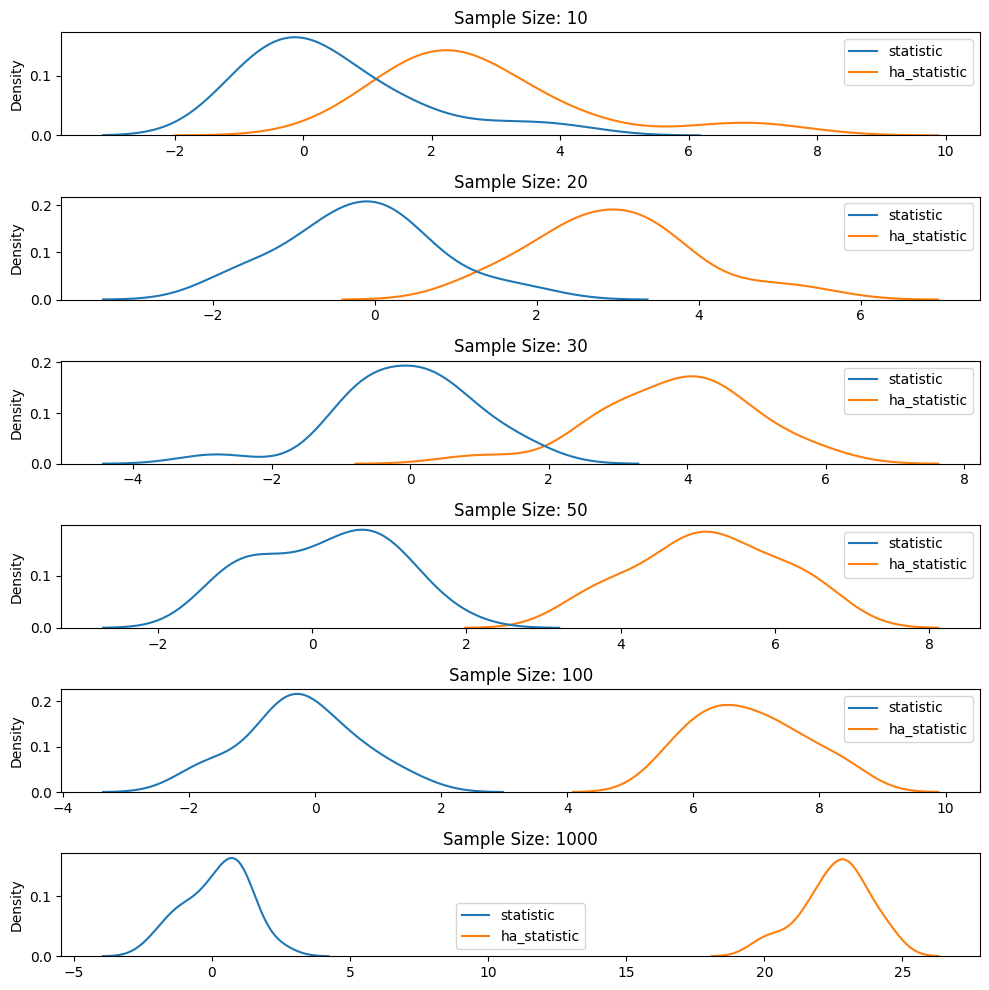

In [4]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# set params
dist_mean_a = 0
dist_mean_b = 0

dist_ha = 1 # distance for alternative hypothesis

sample_sizes = [10, 20, 30, 50, 100, 1000]

# run different trial tests to get various test statistics
trials = []
for sample_size in sample_sizes:
  for seed in range(20):
    np.random.seed(seed)
    samples_a = np.random.normal(loc=dist_mean_a, scale=1, size=sample_size)
    samples_b = np.random.normal(loc=dist_mean_b, scale=1, size=sample_size)

    manual_test_stat = (samples_b.mean() - samples_a.mean())/(np.sqrt((samples_b.std(ddof=1)**2/sample_size) + (samples_a.std(ddof=1)**2/sample_size)))
    manual_test_stat_ha = (samples_b.mean() - samples_a.mean() + dist_ha)/(np.sqrt((samples_b.std(ddof=1)**2/sample_size) + (samples_a.std(ddof=1)**2/sample_size)))

    trials.append({
        'trial': seed,
        'sample_size': sample_size,
        'statistic': manual_test_stat,
        'ha_statistic': manual_test_stat_ha,
    })

df = pd.DataFrame(trials)

# plot results
fig, ax = plt.subplots(len(sample_sizes), 1, figsize=(10,10))
for sample_size in sample_sizes:
  df_sample = df[df['sample_size'] == sample_size][['statistic', 'ha_statistic']]
  sns.kdeplot(df_sample, ax=ax[sample_sizes.index(sample_size)])
  ax[sample_sizes.index(sample_size)].set_title(f'Sample Size: {sample_size}')

fig.tight_layout()
plt.show()

# Power analysis

Given a hypothesis we want to test, we usually want to make sure that the test has sufficient power so that we control both type errors.

The type error controls are usually set and not changeable due to business constraints.
The effect size is not known before the test, but it can either be estimated or just use the minimum effect size necessary to have a significant business change.
So the only truly flexible variable that can be set to achieve sufficient power is the sample size, to discover it a power analysis is conducted.

For the effect size a common metric used is Cohen's d:
\begin{align}
  d = \frac{\bar{x}_1 - \bar{x}_2}{s}
\end{align}
where $s$ is the pooled standard deviation and $\bar{x}$ is a sample mean.

The significance level is usually $α = 0.05$ and $power = 0.8$.

Given those values we can then solve to find a minimum sample size, or see the power given our current sample size.

In [5]:
from statsmodels.stats.power import TTestIndPower
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

signficance_level = 0.05
power = 0.8
effect_size = 0.2

analysis = TTestIndPower()
result = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=1.0, alpha=signficance_level)
print(f"Minimum sample size: {result}")

Minimum sample size: 393.4056989990335


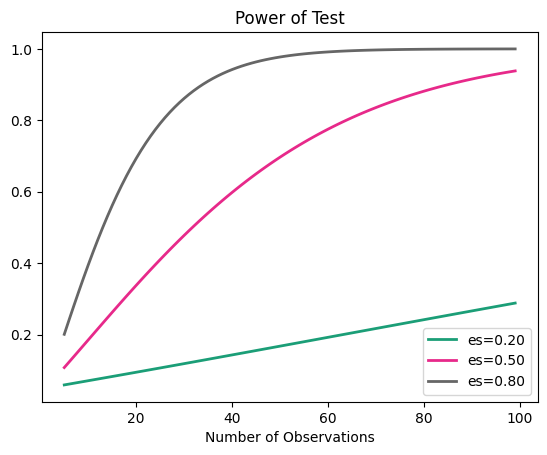

In [6]:
# We can also vary the effect size and see the power for each sample size
analysis.plot_power(dep_var='nobs', nobs=np.arange(5, 100), effect_size=np.array([0.2, 0.5, 0.8]))
plt.show()